In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from keras.layers import  *
from keras.models import Model

2024-03-04 18:12:34.590122: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-04 18:12:34.590193: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-04 18:12:34.591116: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
# define two sets of inputs
inputA = Input(shape=(32,))
inputB = Input(shape=(128,))


In [4]:
# the first branch operates on the first input

x=Dense(8,activation='relu')(inputA)
x1=Dense(4,activation='relu')(x)


In [5]:
# the second branch opreates on the second input

y=Dense(64,activation='relu')(inputB)
y1=Dense(32,activation='relu')(y)
y2=Dense(4,activation='relu')(y1)

In [6]:
# combine the output of the two branches

combined=concatenate([x1,y2])

In [8]:
# apply a FC layer and then a regression prediction on the
# combined outputs
z = Dense(2, activation="relu")(combined)
z1 = Dense(1, activation="linear")(z)

In [9]:
# our model will accept the inputs of the two branches and
# then output a single value
model = Model(inputs=[inputA, inputB], outputs=z1)

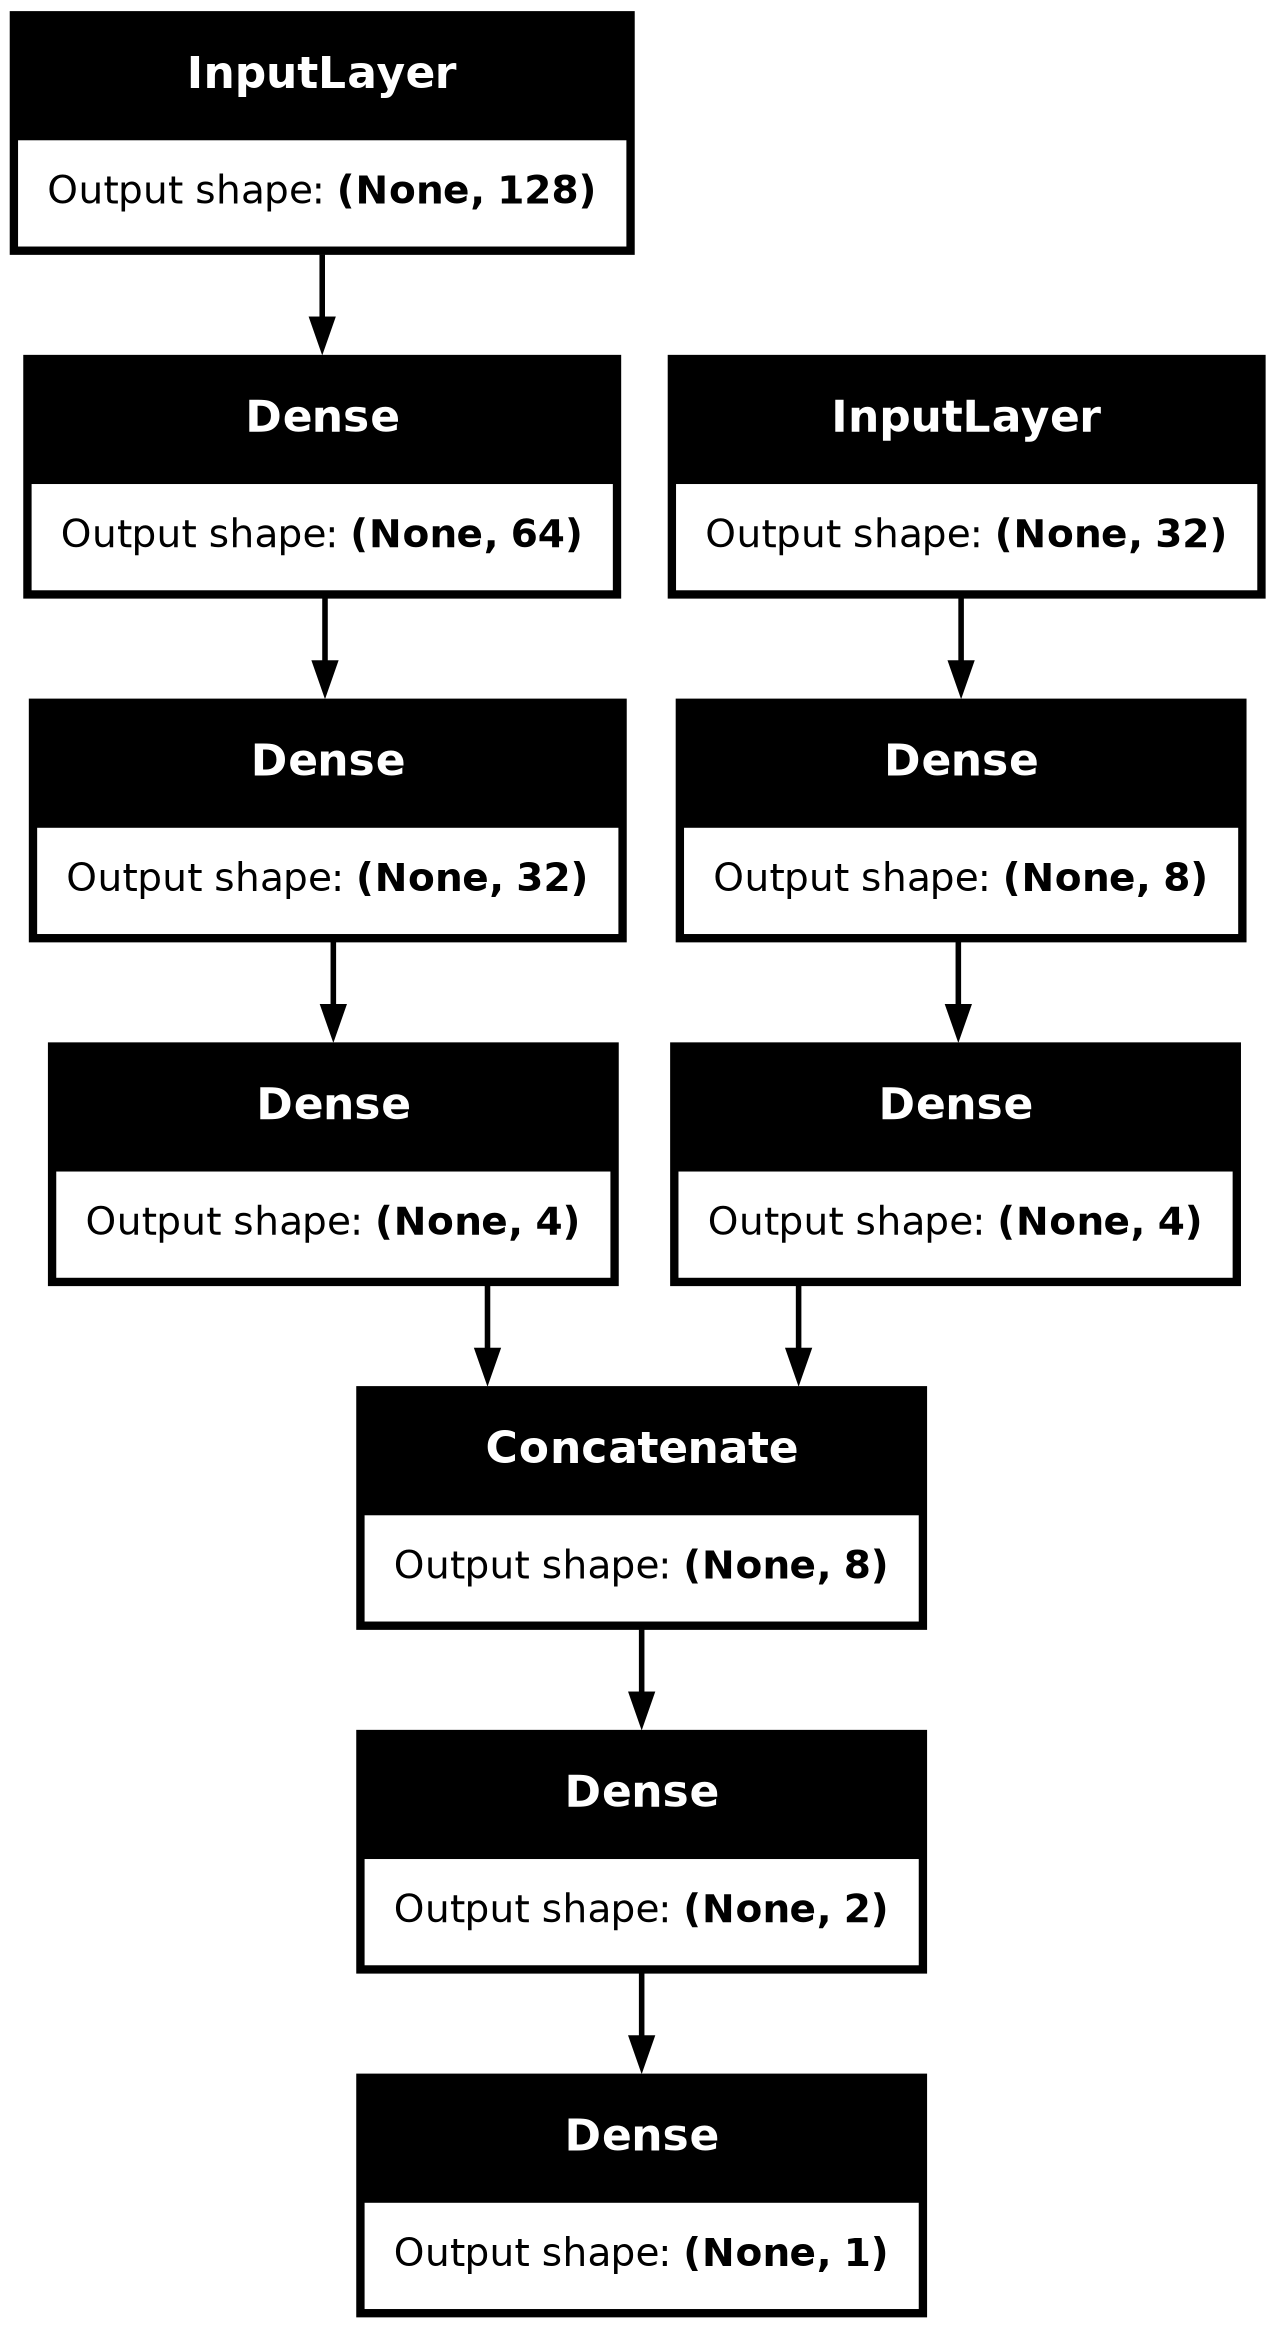

In [11]:
from keras.utils import plot_model
plot_model(model,show_shapes=True)